# Food Recommendation System


dataset : https://www.kaggle.com/datasets/thedevastator/now-with-more-nutrients?select=cleaned_ingredients.csv

# Data Analysis

- NDB_No: National Nutrient Database Number (Integer)
- Descrip: Description of the food (String)
- Energy_kcal: Energy in kilocalories (Integer)
- Protein_g: Protein in grams (Float)
- Saturated_fats_g: Saturated fats in grams (Float)
- Fat_g: Fat in grams (Float)
- Carb_g: Carbohydrates in grams (Float)
- Fiber_g: Fiber in grams (Float)
- Sugar_g: Sugar in grams (Float)
- Calcium_mg: Calcium in milligrams (Float)
- Iron_mg: Iron in milligrams (Float)
- Magnesium_mg: Magnesium in milligrams (Float)
- Phosphorus_mg: Phosphorus in milligrams (Float)
- Potassium_mg: Potassium in milligrams (Float)
- Sodium_mg: Sodium in milligrams (Float)
- Zinc_mg: Zinc in milligrams (Float)
- Copper_mcg: Copper in micrograms (Float)
- Manganese_mg: Manganese in milligrams (Float)
- Selenium_mcg: Selenium in micrograms (Float)
- VitC_mg: Vitamin C in milligrams (Float)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/dataset.csv')
df.head()

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.0,0.85,51.368,81.11,0.06,0.0,0.06,24.0,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
1,1002,butter whipped w salt,718.0,0.49,45.390,78.30,2.87,0.0,0.06,23.0,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
2,1003,butter oil anhydrous,876.0,0.28,61.924,99.48,0.00,0.0,0.00,4.0,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.8,0.0
3,1004,cheese blue,353.0,21.40,18.669,28.74,2.34,0.0,0.50,528.0,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.0,23.24,18.764,29.68,2.79,0.0,0.51,674.0,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5


### Data Assessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDB_No            9318 non-null   object 
 1   Descrip           9318 non-null   object 
 2   Energy_kcal       9318 non-null   float64
 3   Protein_g         9318 non-null   float64
 4   Saturated_fats_g  9318 non-null   float64
 5   Fat_g             9318 non-null   float64
 6   Carb_g            9318 non-null   float64
 7   Fiber_g           9318 non-null   float64
 8   Sugar_g           9318 non-null   float64
 9   Calcium_mg        9318 non-null   float64
 10  Iron_mg           9318 non-null   float64
 11  Magnesium_mg      9318 non-null   object 
 12  Phosphorus_mg     9318 non-null   float64
 13  Potassium_mg      9318 non-null   float64
 14  Sodium_mg         9318 non-null   float64
 15  Zinc_mg           9318 non-null   float64
 16  Copper_mcg        9318 non-null   float64


the column `Magnesium_mg`, `ViitE_mg` datatype should be `float64`. Before that, let's find out if it's intentionally object data-type or a fault.

In [3]:
df.isnull().any().value_counts()

False    29
Name: count, dtype: int64

In [4]:
df.duplicated().value_counts()

False    9318
Name: count, dtype: int64

In [5]:
pattern = '[0-9]*.[0-9]\\s|[^0-9.]'

In [6]:
matches_mag = df.Magnesium_mg.str.contains(pattern, regex=True, case=False)
matches_mag.value_counts()

Magnesium_mg
False    9317
True        1
Name: count, dtype: int64

it seems like there's one non-numeric row, let's find out what it is.

In [7]:
df.loc[matches_mag].loc[:, 'Magnesium_mg']

9242    X
Name: Magnesium_mg, dtype: object

We don't know why thevalue is `X`on index 9242 for `Magnesium_mg`, we will see on the `VitE_mg` column whether there's a similar case like this or not.

In [8]:
matches_vit = df.VitE_mg.str.contains(pattern, regex=True, case=False)
df.loc[matches_vit]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
9195,O058,hare shoulder,144.117,21.13,2.698,6.58,0.0,0.0,0.0,57.51,...,0.0,0.07,0.27,5.04,0.28,2.20,0.0,0.0,0.58 1.46,0.0
9196,O059,hare chops,106.355,20.62,1.028,2.55,0.0,0.0,0.0,38.36,...,0.0,0.07,0.28,4.85,0.22,3.85,0.0,0.0,0.69 1.73,0.0
9197,O060,hare leg,120.217,20.52,0.910,4.16,0.0,0.0,0.0,53.02,...,0.0,0.08,0.22,5.63,0.24,1.95,0.0,0.0,0.58 1.44,0.0
9198,O061,rabbit shoulder,151.765,20.01,3.142,7.96,0.0,0.0,0.0,46.37,...,0.0,0.03,0.14,4.38,0.30,1.80,0.0,0.0,0.49 1.22,0.0
9199,O062,rabbit chops,135.035,22.61,1.907,4.88,0.0,0.0,0.0,25.48,...,0.0,0.02,0.08,7.54,0.24,2.10,0.0,0.0,0.33 0.83,0.0
9200,O063,rabbit leg,139.576,21.31,1.575,5.99,0.0,0.0,0.0,22.31,...,0.0,0.03,0.10,5.02,0.26,1.80,0.0,0.0,0.29 0.72,0.0


Wow, there's 6 rows unusual VitE_mg. It seems like there's a miistake when inputting these data. For better data understanding, we will remove them from dataframe and convert the `VitE_mg` and `Magnesium_mg` column into float64.

In [9]:
df.loc[matches_vit | matches_mag]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
9195,O058,hare shoulder,144.117,21.13,2.698,6.58,0.0,0.0,0.0,57.51,...,0.0,0.07,0.27,5.04,0.28,2.20,0.0,0.0,0.58 1.46,0.0
9196,O059,hare chops,106.355,20.62,1.028,2.55,0.0,0.0,0.0,38.36,...,0.0,0.07,0.28,4.85,0.22,3.85,0.0,0.0,0.69 1.73,0.0
9197,O060,hare leg,120.217,20.52,0.910,4.16,0.0,0.0,0.0,53.02,...,0.0,0.08,0.22,5.63,0.24,1.95,0.0,0.0,0.58 1.44,0.0
9198,O061,rabbit shoulder,151.765,20.01,3.142,7.96,0.0,0.0,0.0,46.37,...,0.0,0.03,0.14,4.38,0.30,1.80,0.0,0.0,0.49 1.22,0.0
9199,O062,rabbit chops,135.035,22.61,1.907,4.88,0.0,0.0,0.0,25.48,...,0.0,0.02,0.08,7.54,0.24,2.10,0.0,0.0,0.33 0.83,0.0
9200,O063,rabbit leg,139.576,21.31,1.575,5.99,0.0,0.0,0.0,22.31,...,0.0,0.03,0.10,5.02,0.26,1.80,0.0,0.0,0.29 0.72,0.0
9242,P042,nalla bontha,86.996,19.82,0.238,0.72,0.0,0.0,0.0,9.04,...,0.0,0.04,0.01,0.56,83.41,1714.00,0.0,0.0,0.9,0.0


In [10]:
df.drop(df.loc[matches_mag | matches_vit].index, inplace=True)

In [11]:
df.loc[matches_vit | matches_mag]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg


In [12]:
df.Magnesium_mg = pd.to_numeric(df.Magnesium_mg)
df.VitE_mg = pd.to_numeric(df.VitE_mg)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9311 entries, 0 to 9317
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDB_No            9311 non-null   object 
 1   Descrip           9311 non-null   object 
 2   Energy_kcal       9311 non-null   float64
 3   Protein_g         9311 non-null   float64
 4   Saturated_fats_g  9311 non-null   float64
 5   Fat_g             9311 non-null   float64
 6   Carb_g            9311 non-null   float64
 7   Fiber_g           9311 non-null   float64
 8   Sugar_g           9311 non-null   float64
 9   Calcium_mg        9311 non-null   float64
 10  Iron_mg           9311 non-null   float64
 11  Magnesium_mg      9311 non-null   float64
 12  Phosphorus_mg     9311 non-null   float64
 13  Potassium_mg      9311 non-null   float64
 14  Sodium_mg         9311 non-null   float64
 15  Zinc_mg           9311 non-null   float64
 16  Copper_mcg        9311 non-null   float64
 17  

# Exploratory Data Analysis

In [13]:
df

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.000,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
1,1002,butter whipped w salt,718.000,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
2,1003,butter oil anhydrous,876.000,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.80,0.0
3,1004,cheese blue,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,S006,rohu,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.40,0.0
9314,S007,crab,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
9315,S008,prawns big,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0.00,0.0
9316,S009,prawns small,70.983,13.07,0.19700,0.78,0.00,0.0,0.00,67.99,...,0.0,0.010,0.030,0.540,207.000,1306.0,0.00,0.0,1.75,0.0


In [14]:
df.describe()

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Magnesium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
count,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,...,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000
mean,220.968805,11.314473,3.306599,10.206345,21.520262,2.151426,6.527797,73.655052,2.665231,33.628227,...,8.641603,0.201621,0.226651,3.299695,1.892777,36.491889,1.136141,89.200418,0.908306,0.344139
std,169.077023,10.438662,6.300781,15.580578,27.001992,4.454334,13.500564,198.202253,5.634001,57.354447,...,64.170982,0.495069,0.427517,4.648445,15.721772,161.148690,4.159903,750.929699,4.442515,3.005078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,2.330000,0.135500,0.820000,0.000000,0.000000,0.000000,9.000000,0.490000,10.000000,...,0.000000,0.030000,0.042000,0.383000,0.037000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,183.000000,8.100000,1.318000,4.800000,8.730000,0.400000,0.470000,19.820000,1.300000,20.000000,...,0.000000,0.075000,0.145000,2.000000,0.124000,7.000000,0.010000,1.000000,0.130000,0.000000
75%,331.000000,19.850000,4.000000,13.220000,32.560000,2.500000,5.495000,64.000000,2.595000,30.000000,...,2.800000,0.217000,0.253000,4.934500,0.366000,19.000000,1.115000,19.000000,0.480000,0.000000
max,902.000000,88.320000,95.600000,100.000000,100.000000,79.000000,99.800000,7364.000000,123.600000,781.000000,...,2732.000000,23.375000,17.500000,127.500000,316.000000,2875.000000,98.890000,30000.000000,224.000000,250.000000


It seems like maximum value of calorie is too high for children. Since children daily calories intake are around 900-1200 kcal. We wll remove foods that has calories >= 500. And also, the total of saturated fats no more than 10% of total calories. 

In [15]:
high_cal = df.Energy_kcal >= 500
df.drop(df.loc[high_cal].index, inplace=True)

In [16]:
df

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
3,1004,cheese blue,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
5,1006,cheese brie,334.000,20.75,17.41000,27.68,0.45,0.0,0.45,184.00,...,0.0,0.070,0.520,0.380,0.235,65.0,1.65,174.0,0.24,0.5
6,1007,cheese camembert,300.000,19.80,15.25900,24.26,0.46,0.0,0.46,388.00,...,0.0,0.028,0.488,0.630,0.227,62.0,1.30,241.0,0.21,0.4
7,1008,cheese caraway,376.000,25.18,18.58400,29.20,3.06,0.0,0.00,673.00,...,0.0,0.031,0.450,0.180,0.074,18.0,0.27,271.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,S006,rohu,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.40,0.0
9314,S007,crab,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
9315,S008,prawns big,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0.00,0.0
9316,S009,prawns small,70.983,13.07,0.19700,0.78,0.00,0.0,0.00,67.99,...,0.0,0.010,0.030,0.540,207.000,1306.0,0.00,0.0,1.75,0.0


# Food Nutrients Distributions

In [17]:
nutr = ['Energy_kcal', 'Protein_g', 'Saturated_fats_g',
       'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg',
       'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg',
       'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg',
       'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg',
       'VitA_mcg', 'VitE_mg', 'VitD2_mcg']


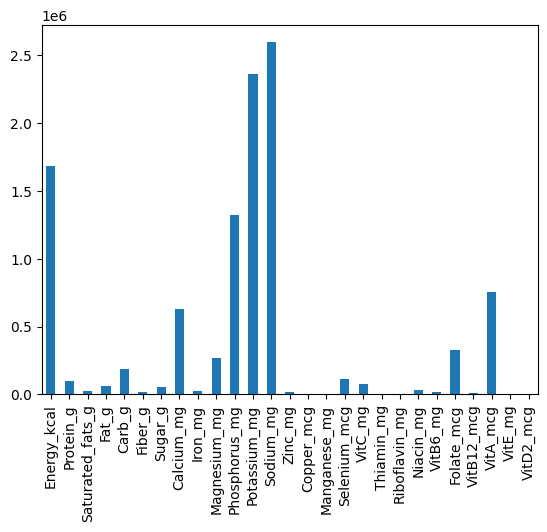

In [18]:
df.loc[:, nutr].sum().plot.bar()
plt.show()

## Balancing Nutrients

The Food Distribution seems high content of Sodium, Potassium and Phosphorus. We need more balance food distribution for better food recommendation for children.

according to <a href="https://www.fda.gov/food/nutrition-education-resources-materials/sodium-your-diet"> this link</a>. Low Sodium	food is 140 mg of sodium or less. We will remove foods that isn's Low Sodium content.

accoring to <a href="https://www.kidney.org/atoz/content/potassium-ckd-diet#:~:text=A%20food%20that%20is%20considered,have%20more%20potassium%20than%20others."> this link</a>. A food that is considered “high-potassium” generally has 200 mg or more potassium per serving. We will remove foods that has High Potasium, we will set the treshold to 150mg for more balanced data distribution.


In [19]:
low_sod = df.Sodium_mg > 140
df.drop(df.loc[low_sod].index, inplace=True)
high_pot = df.Potassium_mg >= 150
df.drop(df.loc[high_pot].index, inplace=True)

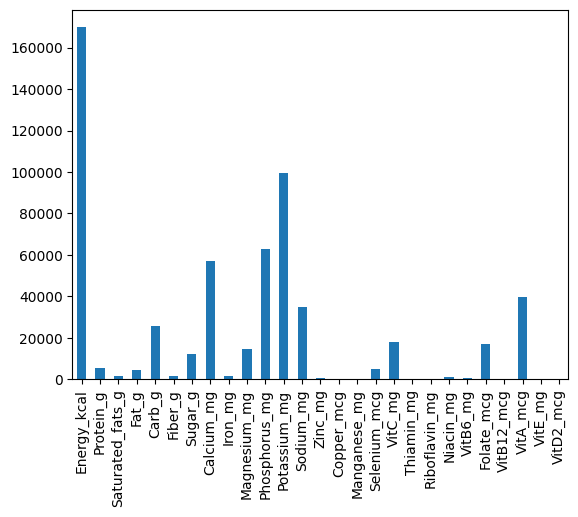

In [20]:
df.loc[:, nutr].sum().plot.bar()
plt.show()
plt.show()

The food distribution looks more balance now. The Phosporus may come from foods that high Potassium or Sodium, so it's automatically balanced.

In [21]:
df

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
35,1036,cheese ricotta whole milk,174.000,11.26,8.295,12.98,3.04,0.0,0.27,207.00,...,0.0,0.013,0.195,0.104,0.043,12.0,0.34,120.0,0.11,0.2
36,1037,cheese ricotta part skim milk,138.000,11.39,4.927,7.91,5.14,0.0,0.31,272.00,...,0.0,0.021,0.185,0.078,0.020,13.0,0.29,107.0,0.07,0.1
48,1049,cream fluid half and half,123.000,3.13,7.032,10.39,4.73,0.0,4.13,107.00,...,0.9,0.030,0.194,0.109,0.050,3.0,0.19,97.0,0.25,0.0
49,1050,cream fluid lt (coffee crm or table crm),191.000,2.96,10.176,19.10,2.82,0.0,3.67,91.00,...,0.8,0.023,0.190,0.090,0.044,2.0,0.14,181.0,0.12,1.1
50,1052,cream fluid lt whipping,292.000,2.17,19.337,30.91,2.96,0.0,2.96,69.00,...,0.6,0.024,0.125,0.042,0.028,4.0,0.20,279.0,0.88,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,Q006,oyster,60.228,9.51,1.087,2.44,0.00,0.0,0.00,126.00,...,0.0,0.060,0.070,0.710,145.000,1612.0,0.00,0.0,1.11,0.0
9300,Q008,tiger prawns orange,64.530,14.25,0.177,0.74,0.00,0.0,0.00,71.89,...,0.0,0.030,0.030,1.180,112.000,807.0,0.00,0.0,2.87,0.0
9305,R005,squid hard shell,76.480,16.82,0.227,0.93,0.00,0.0,0.00,8.73,...,0.0,0.020,0.020,0.650,41.500,622.0,0.00,0.0,0.55,0.0
9306,R006,squid red,78.631,16.25,0.448,1.44,0.00,0.0,0.00,14.15,...,0.0,0.030,0.020,0.710,101.000,1300.0,0.00,0.0,0.47,0.0


# Recommendation-System Machine Learning Model

the model will be built using deep-learning content-based filtering. The Data will be preprocessed first before trained to the model.